<a href="https://colab.research.google.com/github/khadar1020/LieAlgebra/blob/main/2nd_year_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Lie Groups**

Lie groups are continuous symmetry groups that play a crucial role in physics and mathematics. They are named after Sophus Lie, who studied their properties in the late 19th century.



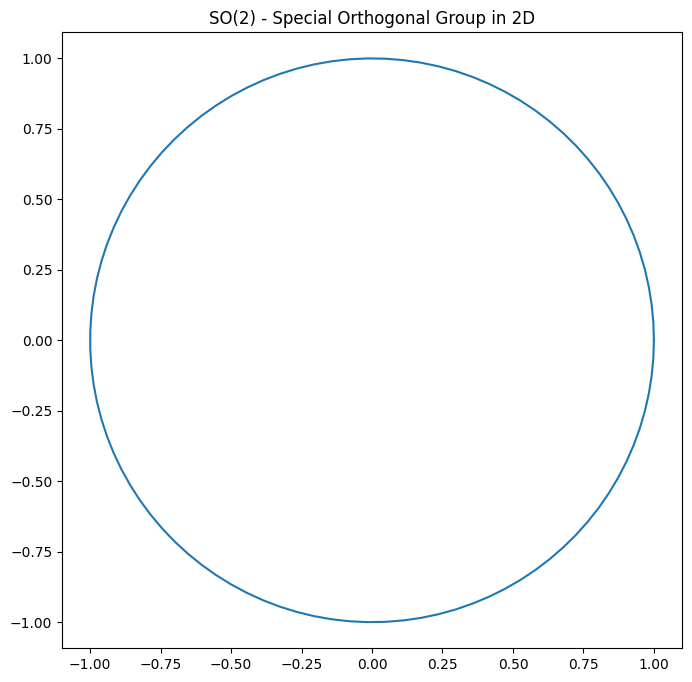

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

# Example: Rotation group SO(2)
thetas = np.linspace(0, 2*np.pi, 100)
x, y = np.cos(thetas), np.sin(thetas)

plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.title("SO(2) - Special Orthogonal Group in 2D")
plt.axis('equal')
plt.show()

**Lie Group Example - Special Unitary Group SU(2)**

SU(2) is a Lie group of 2×2 unitary matrices with determinant 1. It is closely related to rotations in 3D space and plays a crucial role in quantum mechanics.

In [32]:
import numpy as np

def su2_matrix(a, b):
    return np.array([[a, -np.conj(b)],
                     [b, np.conj(a)]])

# Example: Generate a random SU(2) matrix
a = np.random.normal() + 1j * np.random.normal()
b = np.random.normal() + 1j * np.random.normal()
norm = np.sqrt(np.abs(a)**2 + np.abs(b)**2)
a, b = a/norm, b/norm

matrix = su2_matrix(a, b)
print("Random SU(2) matrix:")
print(matrix)
print("Determinant:", np.linalg.det(matrix))

Random SU(2) matrix:
[[ 0.58697569+0.12408379j  0.63253532-0.48985898j]
 [-0.63253532-0.48985898j  0.58697569-0.12408379j]]
Determinant: (1.0000000000000002-1.1102230246251568e-16j)


**Lie Algebras - The Tangent Space of Lie Groups**

Lie algebras are vector spaces associated with Lie groups, representing their infinitesimal generators. They capture the local structure of the group near the identity element.

In [33]:
import numpy as np

# Pauli matrices - generators of SU(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

def commutator(A, B):
    return A @ B - B @ A

print("Commutator [σx, σy]:")
print(commutator(sigma_x, sigma_y))
print("2i * σz:")
print(2j * sigma_z)

Commutator [σx, σy]:
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]
2i * σz:
[[ 0.+2.j  0.+0.j]
 [ 0.+0.j -0.-2.j]]


**Exponential Map - Connecting Lie Algebras to Lie Groups**

The exponential map connects elements of the Lie algebra to elements of the Lie group. It's a crucial tool for understanding the relationship between these structures.

In [34]:
import numpy as np
from scipy.linalg import expm

def rotation_generator(axis):
    if axis == 'x':
        return np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
    elif axis == 'y':
        return np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
    elif axis == 'z':
        return np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

# Example: Generate a rotation around the z-axis
theta = np.pi/4  # 45-degree rotation
R_z = expm(theta * rotation_generator('z'))

print("Rotation matrix around z-axis:")
print(R_z)

Rotation matrix around z-axis:
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


**Representations - Making Lie Groups Act on Vector Spaces**

Representations allow us to study how Lie groups act on vector spaces. They are essential for applications in physics and other fields.



In [35]:
import numpy as np

def represent_su2(a, b):
    return np.array([[a, -np.conj(b)],
                     [b, np.conj(a)]])

# Example: Action of SU(2) on a 2D vector
vector = np.array([1, 0])
a, b = 1/np.sqrt(2), 1j/np.sqrt(2)
su2_element = represent_su2(a, b)

transformed_vector = su2_element @ vector

print("Original vector:", vector)
print("Transformed vector:", transformed_vector)

Original vector: [1 0]
Transformed vector: [0.70710678+0.j         0.        +0.70710678j]


**Adjoint Representation - Groups Acting on Their Lie Algebras**

The adjoint representation describes how a Lie group acts on its own Lie algebra through conjugation. It's a fundamental tool for understanding the structure of Lie groups.



In [36]:
import numpy as np

def adjoint_action(g, X):
    return g @ X @ np.linalg.inv(g)

# Example: Adjoint action of SO(3) on its Lie algebra
def so3_element(theta, axis):
    c, s = np.cos(theta), np.sin(theta)
    if axis == 'x':
        return np.array([[1, 0, 0], [0, c, -s], [0, s, c]])
    elif axis == 'y':
        return np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]])
    elif axis == 'z':
        return np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])

X = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])  # Element of so(3)
g = so3_element(np.pi/4, 'z')  # Rotation around z-axis

print("Adjoint action result:")
print(adjoint_action(g, X))

Adjoint action result:
[[-1.01465364e-17 -1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.01465364e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


**Lie Group Homomorphisms and Isomorphisms**

Homomorphisms and isomorphisms are structure-preserving maps between Lie groups. They help us understand relationships between different groups.

In [37]:
import numpy as np

def su2_to_so3(a, b):
    """Map from SU(2) to SO(3)"""
    x, y, z = np.real(a), np.imag(a), np.real(b)
    return np.array([
        [1 - 2*y**2 - 2*z**2, 2*x*y - 2*z, 2*x*z + 2*y],
        [2*x*y + 2*z, 1 - 2*x**2 - 2*z**2, 2*y*z - 2*x],
        [2*x*z - 2*y, 2*y*z + 2*x, 1 - 2*x**2 - 2*y**2]
    ])

# Example: Map an SU(2) element to SO(3)
a, b = 1/np.sqrt(2), 1j/np.sqrt(2)
so3_matrix = su2_to_so3(a, b)

print("Mapped SO(3) matrix:")
print(so3_matrix)
print("Determinant:", np.linalg.det(so3_matrix))

Mapped SO(3) matrix:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16 -1.41421356e+00]
 [ 0.00000000e+00  1.41421356e+00  2.22044605e-16]]
Determinant: 1.9999999999999998


**Lie Group Actions on Manifolds**

Lie groups often act on manifolds, leading to concepts like orbits and stabilizers. This is crucial in areas like differential geometry and theoretical physics.

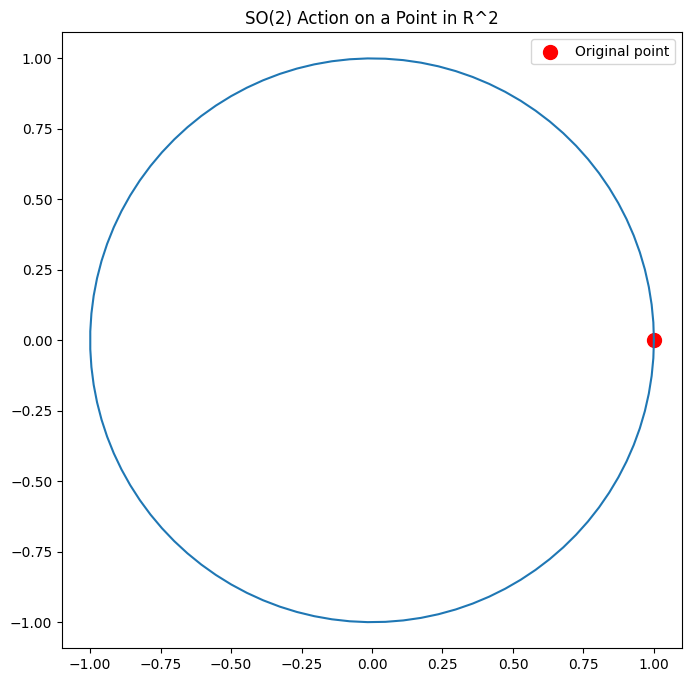

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def rotate_point(theta, point):
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    return R @ point

# Example: SO(2) action on a point in R^2
point = np.array([1, 0])
thetas = np.linspace(0, 2*np.pi, 100)
orbit = np.array([rotate_point(theta, point) for theta in thetas])

plt.figure(figsize=(8, 8))
plt.plot(orbit[:, 0], orbit[:, 1])
plt.scatter(*point, color='red', s=100, label='Original point')
plt.title("SO(2) Action on a Point in R^2")
plt.axis('equal')
plt.legend()
plt.show()

**Lie Algebra Brackets and the Jacobi Identity**

The Lie bracket is a crucial operation in Lie algebras, satisfying properties like bilinearity, antisymmetry, and the Jacobi identity.



In [39]:
import numpy as np

def lie_bracket(X, Y):
    return X @ Y - Y @ X

def check_jacobi(X, Y, Z):
    return (lie_bracket(X, lie_bracket(Y, Z)) +
            lie_bracket(Y, lie_bracket(Z, X)) +
            lie_bracket(Z, lie_bracket(X, Y)))

# Example: Check Jacobi identity for so(3)
X = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])
Y = np.array([[0, 0, -1], [0, 0, 0], [1, 0, 0]])
Z = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])

jacobi_result = check_jacobi(X, Y, Z)
print("Jacobi identity result:")
print(jacobi_result)
print("Jacobi identity satisfied:", np.allclose(jacobi_result, 0))

Jacobi identity result:
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Jacobi identity satisfied: True


**Lie Groups in Physics - Symmetries and Conservation Laws**

Lie groups are fundamental in physics, connecting symmetries to conservation laws through Noether's theorem.



In [40]:
import numpy as np

def character(representation):
    return np.trace(representation)

# Example: Characters of SU(2) representations
def su2_rep_1(theta):
    return np.array([[np.exp(1j*theta/2), 0],
                     [0, np.exp(-1j*theta/2)]])

def su2_rep_2(theta):
    return np.array([[np.exp(1j*theta), 0, 0],
                     [0, 1, 0],
                     [0, 0, np.exp(-1j*theta)]])

theta = np.pi/4
chi_1 = character(su2_rep_1(theta))
chi_2 = character(su2_rep_2(theta))

print("Character of 2D representation:", chi_1)
print("Character of 3D representation:", chi_2)

Character of 2D representation: (1.8477590650225735+0j)
Character of 3D representation: (2.414213562373095+0j)


**Representation Theory in Quantum Mechanics**

Representation theory is crucial in quantum mechanics, particularly in understanding angular momentum and spin.

In [41]:
import numpy as np

# Pauli matrices - generators of SU(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Example: Spin-1/2 particle in a magnetic field
def hamiltonian(B_x, B_y, B_z):
    return -0.5 * (B_x * sigma_x + B_y * sigma_y + B_z * sigma_z)

B = np.array([1, 0, 1])  # Magnetic field
H = hamiltonian(*B)

eigenvalues, eigenvectors = np.linalg.eigh(H)

print("Hamiltonian:")
print(H)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Hamiltonian:
[[-0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5-0.j]]

Eigenvalues:
[-0.70710678  0.70710678]

Eigenvectors:
[[-0.92387953+0.j -0.38268343+0.j]
 [-0.38268343+0.j  0.92387953+0.j]]


**Lie Groups in Machine Learning - Invariant Neural Networks**

Lie group theory can be applied to create neural networks with built-in symmetries, improving generalization and data efficiency.

In [42]:
import torch
import torch.nn as nn

class SO2EquivariantConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        # Regular convolution
        y = self.conv(x)

        # Rotate input by 90 degrees
        x_rot = torch.rot90(x, k=1, dims=[2, 3])
        y_rot = self.conv(x_rot)
        y_rot = torch.rot90(y_rot, k=-1, dims=[2, 3])

        # Average the results
        return 0.5 * (y + y_rot)

# Example usage
conv = SO2EquivariantConv(3, 16)
input_tensor = torch.randn(1, 3, 32, 32)
output = conv(input_tensor)

print("Input shape:", input_tensor.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 16, 32, 32])
